In [55]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
print(os.getcwd())

/Users/edvinrunhellen


In [28]:
df = pd.read_excel("/Users/edvinrunhellen/documents/projekt/hr_data_analysis/HR_Employee_Data.xlsx")

In [30]:
df.head()

,Emp_Id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,IND02438,0.38,0.53,2,157,3,0,1,0,sales,low
1,IND28133,0.80,0.86,5,262,6,0,1,0,sales,medium
2,IND07164,0.11,0.88,7,272,4,0,1,0,sales,medium
3,IND30478,0.72,0.87,5,223,5,0,1,0,sales,low
4,IND24003,0.37,0.52,2,159,3,0,1,0,sales,low


In [32]:
print(df.columns)

Index(['Emp_Id', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')


In [36]:
df['salary_numeric'] = df['salary'].map({'low': 1, 'medium': 2, 'high': 3})

In [38]:
correlation = df[['satisfaction_level', 'salary_numeric']].corr()
print(correlation)

                    satisfaction_level  salary_numeric
satisfaction_level            1.000000        0.050022
salary_numeric                0.050022        1.000000


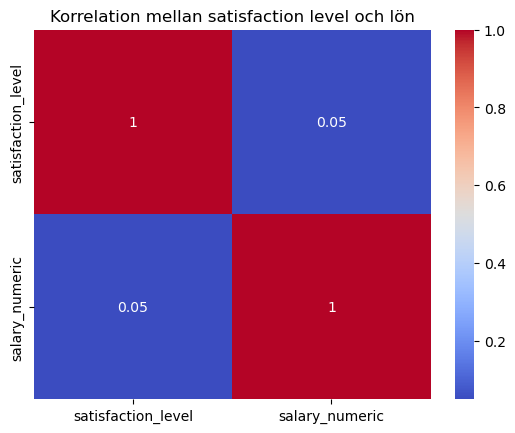

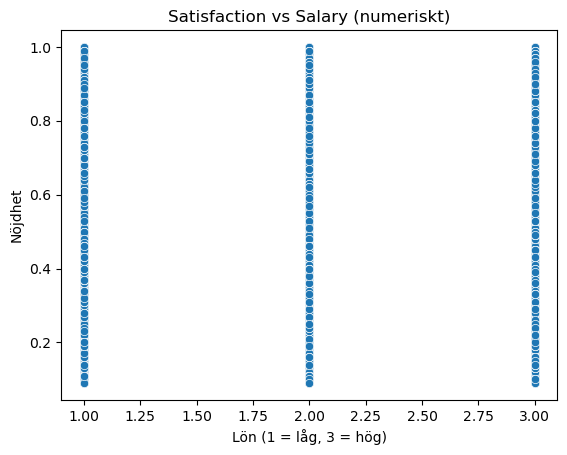

In [46]:
# Heatmap
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Korrelation mellan satisfaction level och lön")
plt.show()

# Scatterplot
sns.scatterplot(data=df, x='salary_numeric', y='satisfaction_level')
plt.title("Satisfaction vs Salary (numeriskt)")
plt.xlabel("Lön (1 = låg, 3 = hög)")
plt.ylabel("Nöjdhet")
plt.show()

Korrelation:
                       average_montly_hours  satisfaction_level
average_montly_hours              1.000000           -0.020048
satisfaction_level               -0.020048            1.000000


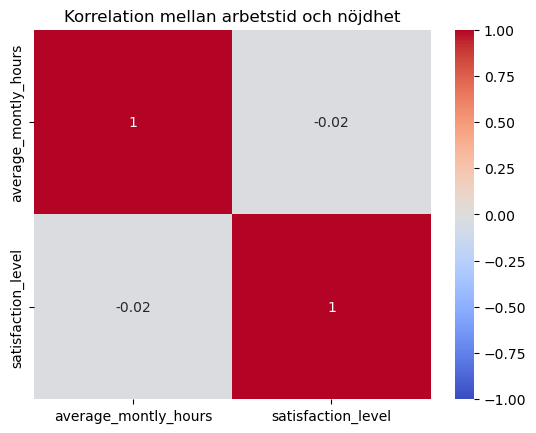

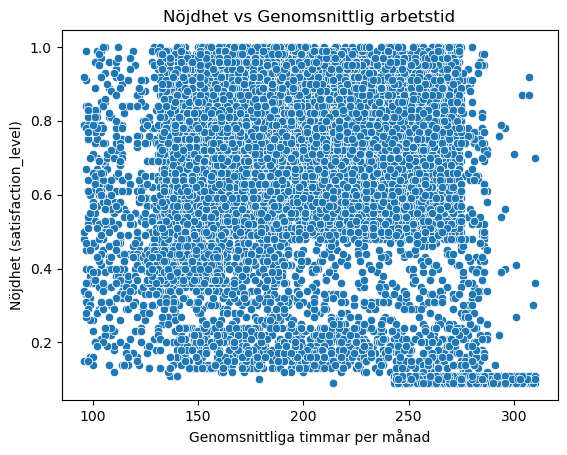

In [51]:
# Korrelation
correlation = df[['average_montly_hours', 'satisfaction_level']].corr()
print("Korrelation:\n", correlation)

# Heatmap
sns.heatmap(correlation, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Korrelation mellan arbetstid och nöjdhet")
plt.show()

# Scatterplot
sns.scatterplot(data=df, x='average_montly_hours', y='satisfaction_level')
plt.title("Nöjdhet vs Genomsnittlig arbetstid")
plt.xlabel("Genomsnittliga timmar per månad")
plt.ylabel("Nöjdhet (satisfaction_level)")
plt.show()

Genomsnittlig lön per avdelning:
Department
management     2.071429
accounting     1.629726
marketing      1.624709
hr             1.607578
RandD          1.602287
product_mng    1.575388
IT             1.571312
technical      1.569485
sales          1.557971
support        1.549125
Name: salary_numeric, dtype: float64


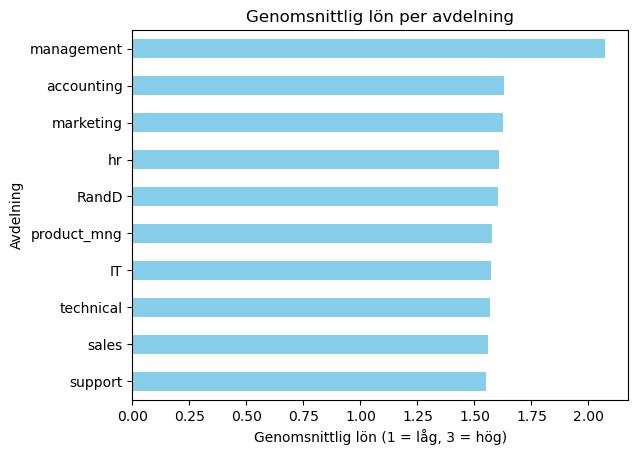

In [57]:
salary_map = {'low': 1, 'medium': 2, 'high': 3}
df['salary_numeric'] = df['salary'].map(salary_map)

# Gruppindela efter department och beräkna genomsnittlig lön
avg_salary_per_dept = df.groupby('Department')['salary_numeric'].mean().sort_values(ascending=False)

print("Genomsnittlig lön per avdelning:")
print(avg_salary_per_dept)

avg_salary_per_dept.plot(kind='barh', color='skyblue')
plt.title("Genomsnittlig lön per avdelning")
plt.xlabel("Genomsnittlig lön (1 = låg, 3 = hög)")
plt.ylabel("Avdelning")
plt.gca().invert_yaxis()  # Högst lön överst
plt.show()

Genomsnittlig tid på företaget per avdelning:
Department
management     4.303175
marketing      3.569930
sales          3.534058
accounting     3.522816
product_mng    3.475610
IT             3.468623
technical      3.411397
support        3.393001
RandD          3.367217
hr             3.355886
Name: time_spend_company, dtype: float64


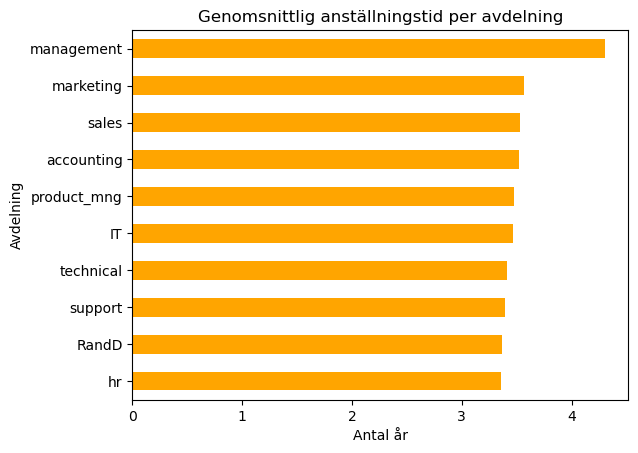

In [59]:
# Gruppindela efter avdelning och räkna genomsnittligt antal år
avg_years_per_dept = df.groupby('Department')['time_spend_company'].mean().sort_values(ascending=False)

print("Genomsnittlig tid på företaget per avdelning:")
print(avg_years_per_dept)


avg_years_per_dept.plot(kind='barh', color='orange')
plt.title("Genomsnittlig anställningstid per avdelning")
plt.xlabel("Antal år")
plt.ylabel("Avdelning")
plt.gca().invert_yaxis()
plt.show()

Antal anställda per avdelning:
Department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64


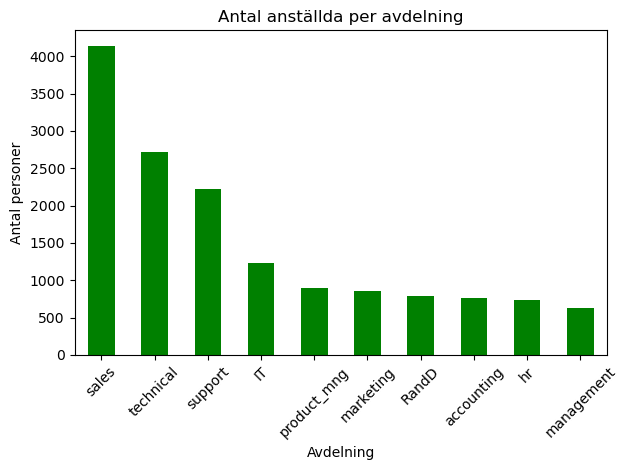

In [61]:
# Räkna antal per avdelning
count_per_department = df['Department'].value_counts()

print("Antal anställda per avdelning:")
print(count_per_department)

count_per_department.plot(kind='bar', color='green')
plt.title("Antal anställda per avdelning")
plt.ylabel("Antal personer")
plt.xlabel("Avdelning")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()